Uppdrag 1

In [ ]:
import pandas as pd
import matplotlib. pyplot as plt

# read in the file, found a lot of NaN
file_path = './Data/riket2023_åk9_np.xlsx'

print(df.head())

In [152]:
# a list with the name of the sheets
sheets_categorys = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

# reads the sheets and saves them as a dictionary
sheets_categorys = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets_categorys}

In [ ]:
# a function to rename all the columns in every sheet
def rename_all_columns(df):
    return df.rename(columns={
        'Unnamed: 0': 'Plats', 
        'Unnamed: 1': 'Huvudman', 
        'Unnamed: 2': 'Totalt (A-F)', 
        'Unnamed: 3': 'Flickor (A-F)', 
        'Unnamed: 4': 'Pojkar (A-F)', 
        'Unnamed: 5': 'Totalt (A-E)', 
        'Unnamed: 6': 'Flickor (A-E)', 
        'Unnamed: 7': 'Pojkar (A-E)', 
        'Unnamed: 8': 'Totalt (Poäng)', 
        'Unnamed: 9': 'Flickor (Poäng)', 
        'Unnamed: 10': 'Pojkar (Poäng)'
    })

In [ ]:
# rename every column in the DataFrame
sheets_categorys = {sheet: rename_all_columns(df) for sheet, df in sheets_categorys.items()}

# removes the NaN values in the DataFrame
sheets_removed_nulls = {sheet: df.dropna() for sheet, df in sheets_categorys.items()}

# removes the first row and resets the index to zero
sheets_removed_nulls = {sheet: df.iloc[1:].reset_index(drop=True) for sheet, df in sheets_removed_nulls.items()}

# found a row with no values, I decided to drop it
sheets_removed_nulls['Svenska som andraspråk'] = sheets_removed_nulls['Svenska som andraspråk'].iloc[:-1]

# print to see that everything went well
print(sheets_removed_nulls['Engelska'])



In [255]:
# tried to create different colours for every bar in the chart
# found info on https://python-graph-gallery.com/3-control-color-of-barplots/
# get a color for each huvudman
colour_huvudman = {
    'Skolverket' : 'red',
    'Kommunal': 'green',
    'Enskild': 'blue',
    'Samtliga': 'orange'
}

# create a function so that I can assign it
def bar_colour(subjects_df):
    return[colour_huvudman.get(huvudman, 'black') for huvudman in subjects_df["Huvudman"]]

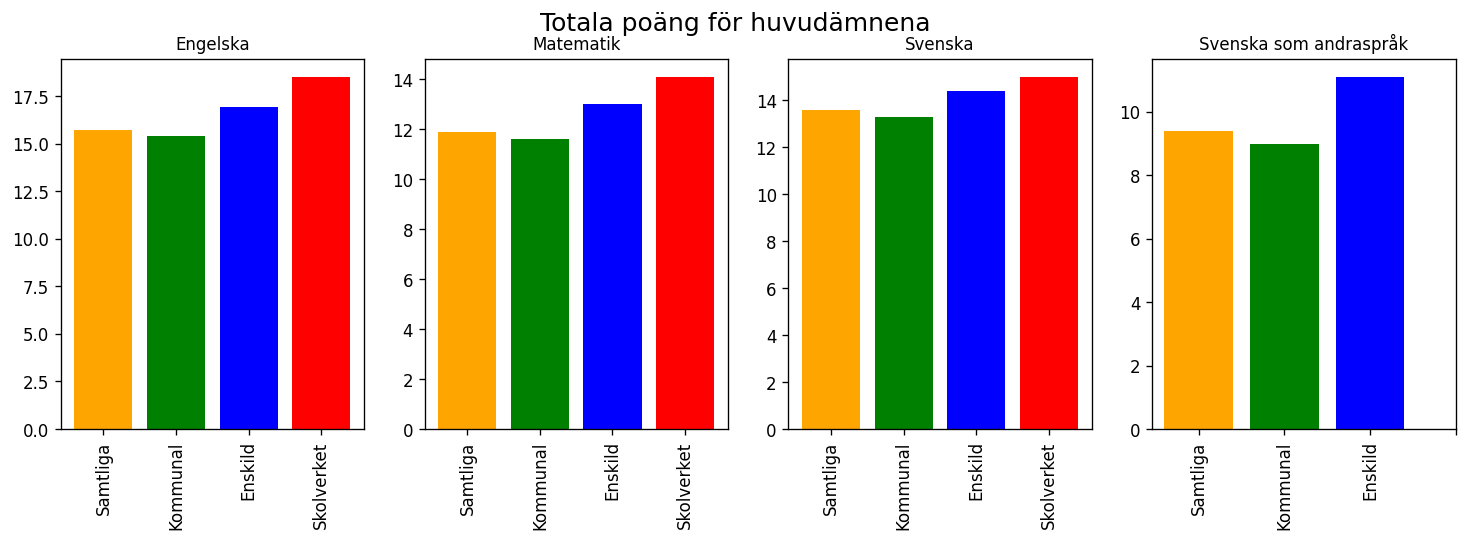

In [258]:
# plot the barchart, need to use subplots 
# categorys = the different subjects for the total points in the total subjects
# english, swedish, maths and swedish as second language
fig, axs = plt.subplots(1, 4, dpi = 120, figsize =(15, 4))

# main title
fig.suptitle("Totala poäng för huvudämnena", fontsize=15) 

# first plot, english
axs[0].bar(sheets_removed_nulls['Engelska']['Huvudman'], sheets_removed_nulls['Engelska']['Totalt (Poäng)'], color = bar_colour((sheets_removed_nulls['Engelska'])))
axs[0].set_title("Engelska", fontsize = 10)
axs[0].set_xticks([0,1,2,3])
axs[0].tick_params(axis='x', rotation=90)

# second plot, math
axs[1].bar(sheets_removed_nulls['Matematik']['Huvudman'], sheets_removed_nulls['Matematik']['Totalt (Poäng)'], color = bar_colour((sheets_removed_nulls['Matematik'])))
axs[1].set_title("Matematik", fontsize = 10)
axs[1].set_xticks([0,1,2,3])
axs[1].tick_params(axis='x', rotation=90)

# third plot for swedish
axs[2].bar(sheets_removed_nulls['Svenska']['Huvudman'], sheets_removed_nulls['Svenska']['Totalt (Poäng)'], color = bar_colour((sheets_removed_nulls['Svenska'])))
axs[2].set_title("Svenska", fontsize = 10)
axs[2].set_xticks([0,1,2,3])
axs[2].tick_params(axis='x', rotation=90)

# fourth plot for swedish as second language
axs[3].bar(sheets_removed_nulls['Svenska som andraspråk']['Huvudman'], sheets_removed_nulls['Svenska som andraspråk']['Totalt (Poäng)'], color = bar_colour((sheets_removed_nulls['Svenska som andraspråk'])))
axs[3].set_title("Svenska som andraspråk", fontsize = 10)
axs[3].set_xticks([0,1,2,3])
axs[3].tick_params(axis='x', rotation=90)

plt.show()

In [ ]:
# rename every column in the DataFrame
sheets_categorys = {sheet: rename_all_columns(df) for sheet, df in sheets_categorys.items()}

# removes the NaN values in the DataFrame
sheets_removed_nulls = {sheet: df.dropna() for sheet, df in sheets_categorys.items()}

# removes the first row and resets the index to zero
sheets_removed_nulls = {sheet: df.iloc[1:].reset_index(drop=True) for sheet, df in sheets_removed_nulls.items()}

# found a row with no values, I decided to drop it
sheets_removed_nulls['Svenska som andraspråk'] = sheets_removed_nulls['Svenska som andraspråk'].iloc[:-1]

# print to see that everything went well
print(sheets_removed_nulls['Engelska'])

